<a href="https://colab.research.google.com/github/ChoiDM/LiTS/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

※ Link : [LITS Challenge](https://competitions.codalab.org/competitions/17094)

※ Submission guide : [Link](https://github.com/PatrickChrist/LITS-CHALLENGE/blob/master/submission-guide.md)

* Label 1 : A rough liver segmentation
* Label 2 : An accurate expert lesion segmentation

※ Since we evaluate the lesion/tumor class 2 only, our program expects the submitted segmentation to have __0 for background/non-lesion and 2 for lesion/tumor.__ We will __not consider liver class 1__, since this is not part of this challenge.

## Install

In [1]:
!pip install nibabel

## Import

In [2]:
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
import nibabel as nib
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
cd /gdrive/My \Drive/Segmentation/LITS

/gdrive/My Drive/Segmentation/LITS


## Data Pre-processing

In [6]:
img_path = glob("Training Batch 1/volume-*.nii")
mask_path = glob("Training Batch 1/segmentation-*.nii")

print("Number of images :", len(img_path))

Number of images : 28


In [7]:
print("Image(volume) path example :", img_path[:3])
print("Mask path example :", mask_path[:3])

Image(volume) path example : ['Training Batch 1/volume-0.nii', 'Training Batch 1/volume-1.nii', 'Training Batch 1/volume-10.nii']
Mask path example : ['Training Batch 1/segmentation-0.nii', 'Training Batch 1/segmentation-1.nii', 'Training Batch 1/segmentation-10.nii']


__Image and Mask Example__

In [8]:
img_ex = nib.load(img_path[2]).get_data()
mask_ex = nib.load(mask_path[2]).get_data()

mask_ex[mask_ex == 1] = 0

print("Number of slices : {0} / Size of each slice : {1}".format(img_ex.shape[2], img_ex.shape[:2]))

Number of slices : 501 / Size of each slice : (512, 512)


[]

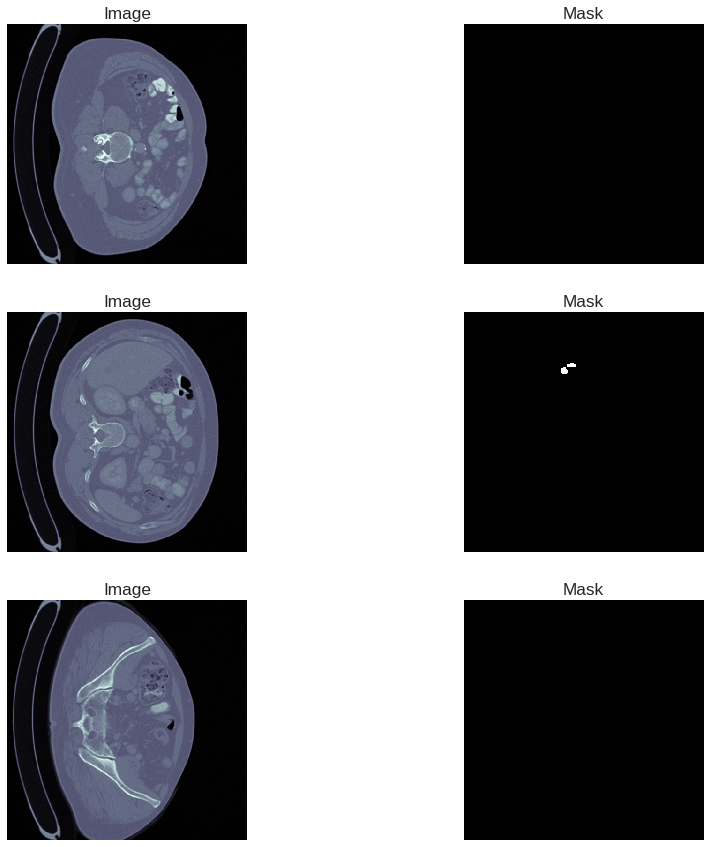

In [9]:
# Three Slices (Random)

fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize = (15, 15))
ax1.imshow(img_ex[:, :, img_ex.shape[2] // 2], cmap = 'bone')
ax1.set_title("Image", fontsize = 'x-large')
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(mask_ex[:, :, mask_ex.shape[2] // 2], cmap = 'bone')
ax2.set_title("Mask", fontsize = 'x-large')
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

ax3.imshow(img_ex[:, :, img_ex.shape[2] // 2 + 100], cmap = 'bone')
ax3.set_title("Image", fontsize = 'x-large')
ax3.grid(False)
ax3.set_xticks([])
ax3.set_yticks([])

ax4.imshow(mask_ex[:, :, mask_ex.shape[2] // 2 + 100], cmap = 'bone')
ax4.set_title("Mask", fontsize = 'x-large')
ax4.grid(False)
ax4.set_xticks([])
ax4.set_yticks([])

ax5.imshow(img_ex[:, :, img_ex.shape[2] // 2 - 100], cmap = 'bone')
ax5.set_title("Image", fontsize = 'x-large')
ax5.grid(False)
ax5.set_xticks([])
ax5.set_yticks([])

ax6.imshow(mask_ex[:, :, mask_ex.shape[2] // 2 - 100], cmap = 'bone')
ax6.set_title("Mask", fontsize = 'x-large')
ax6.grid(False)
ax6.set_xticks([])
ax6.set_yticks([])

In [0]:
class_percentage = []

for i in range(mask_ex.shape[2]):
  _, count = np.unique(mask_ex[: ,:, i], return_counts = True)
  
  if len(count) == 2:
    per = count[1] / np.sum(count) * 100
  else:
    per = 0
  
  class_percentage.append(per)

Text(0,0.5,'Class percentage (%)')

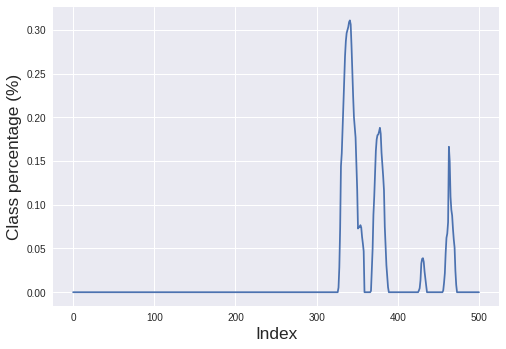

In [11]:
plt.plot(class_percentage)
plt.xlabel("Index", fontsize = "x-large")
plt.ylabel("Class percentage (%)", fontsize = "x-large")

In [12]:
max_idx = class_percentage.index(max(class_percentage))
print("The index of maximum class percentage : {0} [{1}%]".format(max_idx, format(class_percentage[max_idx], '.2f')))

The index of maximum class percentage : 341 [0.31%]


[]

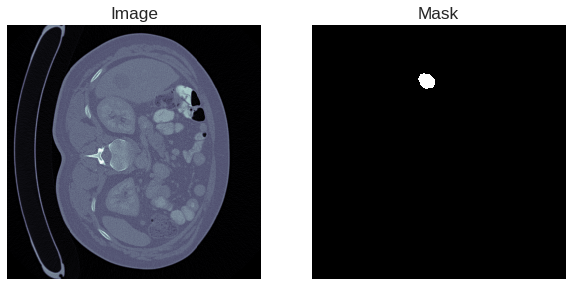

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(img_ex[:, :, max_idx], cmap = 'bone')
ax1.set_title("Image", fontsize = 'x-large')
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

mask_max = mask_ex[:, :, max_idx]
mask_max[mask_max == 1] = 0
ax2.imshow(mask_max, cmap = 'bone')
ax2.set_title("Mask", fontsize = 'x-large')
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

We have to deal with __heavy class imbalance__. Methods to solve this problem are listed below.
* Weighted Loss function
* Down-sampling positive pixels (not appropriate)
* Patch

__Class percentages of all images__

In [0]:
max_percentage = []

for path in mask_path:
  
  mask_ex = nib.load(path).get_data()
  mask_ex[mask_ex == 1] = 0
  
  class_percentage = []

  for i in range(mask_ex.shape[2]):
    _, count = np.unique(mask_ex[: ,:, i], return_counts = True)
  
    if len(count) == 2:
      per = count[1] / np.sum(count) * 100
    else:
      per = 0
  
    class_percentage.append(per)
  
  max_percentage.append(max(class_percentage))
  

In [0]:
class_percentage = []

Text(0,0.5,'Max Class percentage (%)')

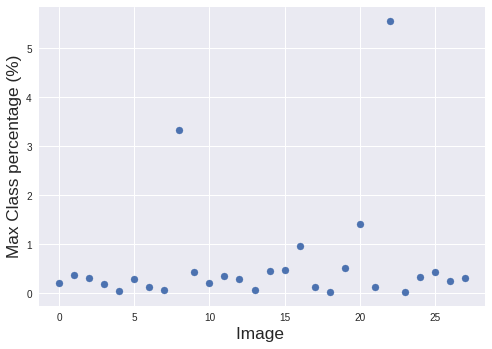

In [16]:
plt.scatter(list(range(len(max_percentage))), max_percentage)
plt.xlabel("Image ", fontsize = "x-large")
plt.ylabel("Max Class percentage (%)", fontsize = "x-large")

In [17]:
print("\'Maximum\' Class percentage of all images :", format(max(max_percentage), '.3f'), "%")
print("\'Minimum\' Class percentage of all images :", format(min(max_percentage), '.3f'), "%")

'Maximum' Class percentage of all images : 5.557 %
'Minimum' Class percentage of all images : 0.031 %


__Patch Sampling__

In [0]:
img_ex = nib.load(img_path[2]).get_data()
mask_ex = nib.load(mask_path[2]).get_data()

mask_ex[mask_ex == 1] = 0

In [0]:
patch_ratio = [0, 64, 128, 192, 256, 320, 384, 448, 512]

In [0]:
positive_patch = []
positive_mask = []

for x_bin in range(2, len(patch_ratio)):
  for y_bin in range(2, len(patch_ratio)):
    mask_patch = mask_ex[patch_ratio[x_bin-2] : patch_ratio[x_bin], patch_ratio[y_bin - 2] : patch_ratio[y_bin], max_idx]
    
    if 2 in np.unique(mask_patch):
      
      img_patch = img_ex[patch_ratio[x_bin-2] : patch_ratio[x_bin], patch_ratio[y_bin - 2] : patch_ratio[y_bin], max_idx]
      
      positive_patch.append(img_patch)
      positive_mask.append(mask_patch)

In [21]:
len(positive_mask)

6

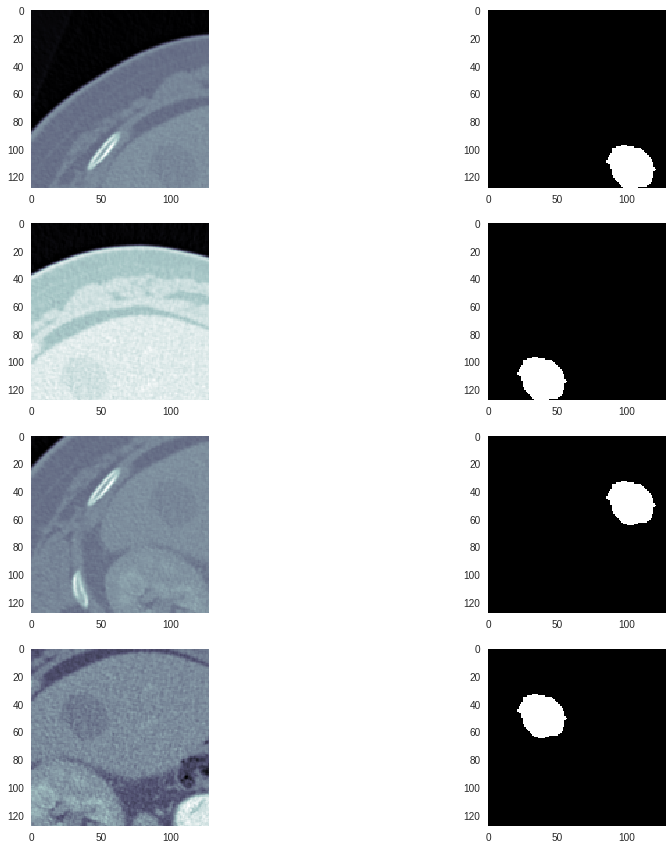

In [22]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]) = plt.subplots(4, 2, figsize = (15, 15))

ax1.imshow(positive_patch[0], cmap = 'bone')
ax1.grid(False)
ax2.imshow(positive_mask[0], cmap = 'bone')
ax2.grid(False)

ax3.imshow(positive_patch[1], cmap = 'bone')
ax3.grid(False)
ax4.imshow(positive_mask[1], cmap = 'bone')
ax4.grid(False)

ax5.imshow(positive_patch[2], cmap = 'bone')
ax5.grid(False)
ax6.imshow(positive_mask[2], cmap = 'bone')
ax6.grid(False)

ax7.imshow(positive_patch[3], cmap = 'bone')
ax7.grid(False)
ax8.imshow(positive_mask[3], cmap = 'bone')
ax8.grid(False)